<a href="https://colab.research.google.com/github/akashgardas/Machine-Learning/blob/main/EDA/Seaborn_Titanic_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.shape

(891, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Cleaning data

In [11]:
# missing values analysis
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


Insight: Huge percentage of deck values are missing.
So, it's better to drop the column

In [13]:
# Handling missing values
# age - with mean
df['age'] = df['age'].fillna(df['age'].mean())

# embarked - mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# embarked_town - mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Drop deck
df = df.drop('deck', axis=1)

In [14]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [15]:
# Handling duplicates
df.duplicated().sum()

np.int64(111)

In [16]:
# Remove duplicates
df = df.drop_duplicates()

In [17]:
# Handling data types
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     780 non-null    int64   
 1   pclass       780 non-null    int64   
 2   sex          780 non-null    category
 3   age          780 non-null    float64 
 4   sibsp        780 non-null    int64   
 5   parch        780 non-null    int64   
 6   fare         780 non-null    float64 
 7   embarked     780 non-null    category
 8   class        780 non-null    category
 9   who          780 non-null    object  
 10  adult_male   780 non-null    bool    
 11  embark_town  780 non-null    object  
 12  alive        780 non-null    object  
 13  alone        780 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 65.1+ KB


## Univariate analysis

### Numerical

In [23]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe()

,survived,pclass,age,sibsp,parch,fare
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.492657,0.854452,13.708883,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


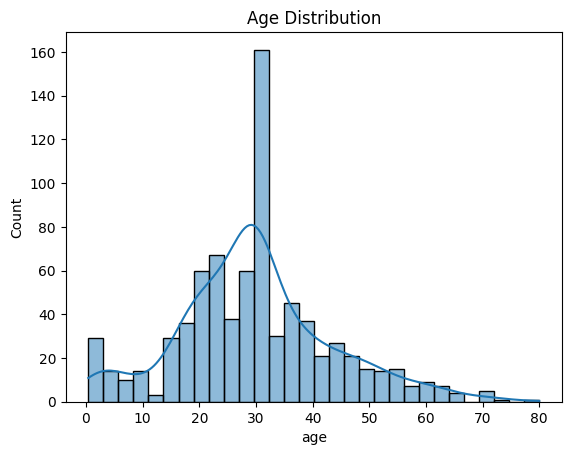

In [28]:
# Age distribution of passengers
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

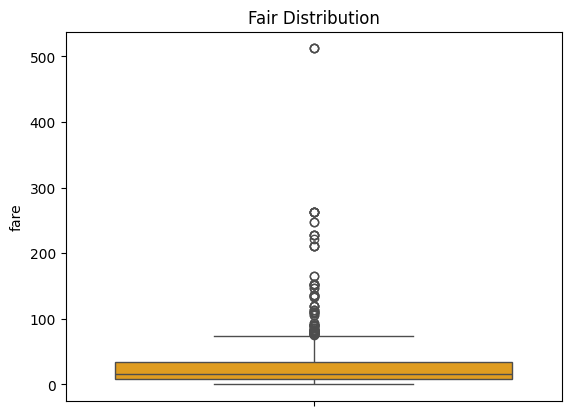

In [27]:
# Fare paid
sns.boxplot(df['fare'], color='orange')
plt.title('Fair Distribution')
plt.show()

### Categorical features


In [29]:
cat_cols = df.select_dtypes(include=['category']).columns
df[cat_cols].describe()

,sex,embarked,class
count,780,780,780
unique,2,3,3
top,male,S,Third
freq,488,567,404


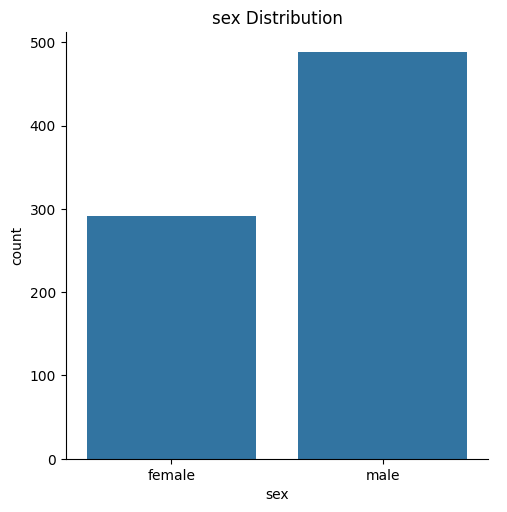

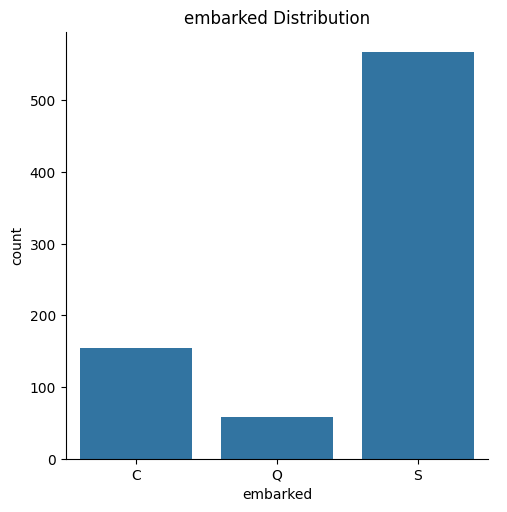

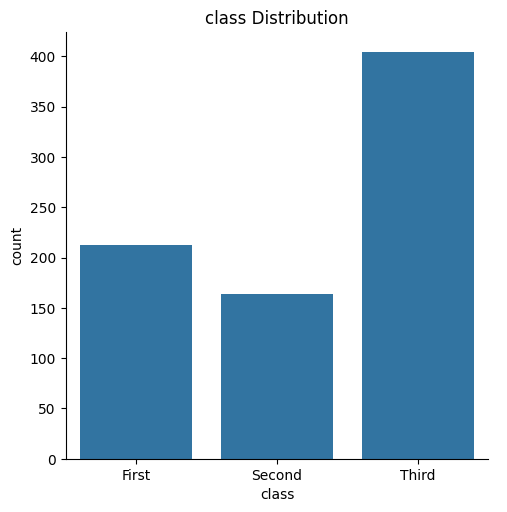

In [30]:
for col in cat_cols:
    sns.catplot(x=col, kind='count', data=df)
    plt.title(f'{col} Distribution')
    plt.show()

## Bivariate Analysis

### Numerical vs Categorical

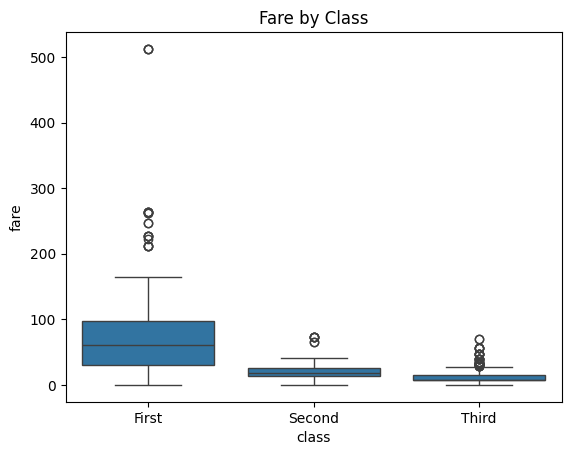

In [32]:
# Fare by class
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare by Class')
plt.show()

### Categorical vs Categorical

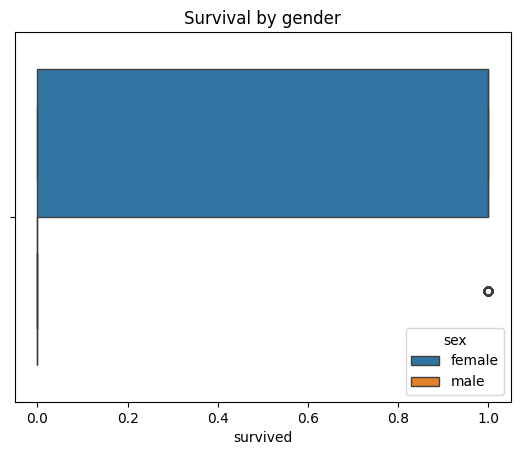

In [38]:
# Survival by gender
sns.boxplot(data=df, x='survived', hue='sex')
plt.title('Survival by gender')
plt.show()

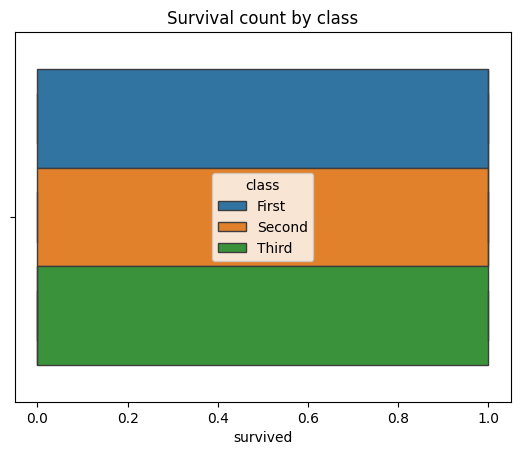

In [39]:
# Survival count by class
sns.boxplot(data=df, x='survived', hue='class')
plt.title('Survival count by class')
plt.show()

## Multivariate Analysis


<Axes: >

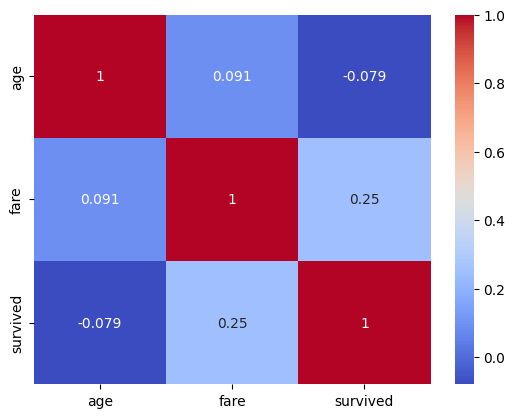

In [41]:
corr = df[['age', 'fare', 'survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

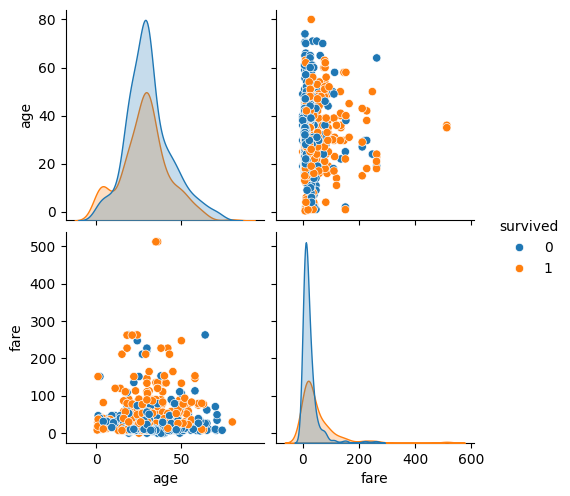

In [42]:
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')

## Outlier Detection

No of outliers in fare:  97


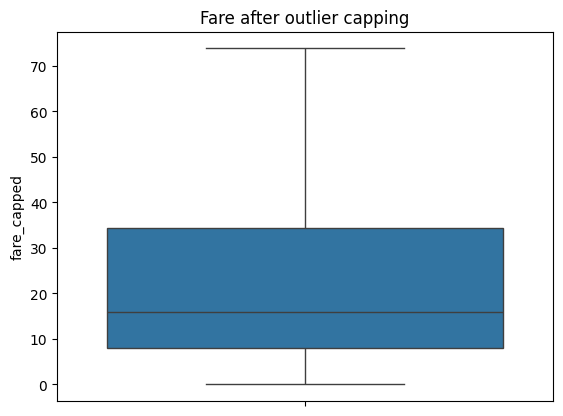

In [44]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(f'No of outliers in fare: ', len(outliers))

# Outliers
df['fare_capped'] = df['fare'].clip(lower_bound, upper_bound)
sns.boxplot(df['fare_capped'])
plt.title('Fare after outlier capping')
plt.show()